Main Objective of This Project

1. Analyze wine characteristics (like acidity, body, type, price, etc.)

2. Predict the wine rating (from 0 to 5 stars)

3. Create an interactive app where someone can input wine features and get a predicted rating!

4. Understand what factors affect wine quality most (EDA insights)

5. Uncover relationships between physicochemical properties and wine quality.



In [1]:
import pandas as pd

# Load the dataset
df = pd.read_csv("wines_SPA.csv")

# Show basic info
print(df.shape)
print(df.head())


(7500, 11)
          winery           wine  year  rating  num_reviews country  \
0  Teso La Monja          Tinto  2013     4.9           58  Espana   
1         Artadi  Vina El Pison  2018     4.9           31  Espana   
2   Vega Sicilia          Unico  2009     4.8         1793  Espana   
3   Vega Sicilia          Unico  1999     4.8         1705  Espana   
4   Vega Sicilia          Unico  1996     4.8         1309  Espana   

             region   price                  type  body  acidity  
0              Toro  995.00              Toro Red   5.0      3.0  
1    Vino de Espana  313.50           Tempranillo   4.0      2.0  
2  Ribera del Duero  324.95  Ribera Del Duero Red   5.0      3.0  
3  Ribera del Duero  692.96  Ribera Del Duero Red   5.0      3.0  
4  Ribera del Duero  778.06  Ribera Del Duero Red   5.0      3.0  


In [2]:
# Check how many null values are in each column
print(df.isnull().sum())


winery            0
wine              0
year              2
rating            0
num_reviews       0
country           0
region            0
price             0
type            545
body           1169
acidity        1169
dtype: int64


In [3]:
# Understand the data types of each column
print(df.dtypes)


winery          object
wine            object
year            object
rating         float64
num_reviews      int64
country         object
region          object
price          float64
type            object
body           float64
acidity        float64
dtype: object


In [4]:
# Drop rows with missing 'year' (only 2 rows)
df = df.dropna(subset=['year'])

# Fill 'type' with the mode (most common wine type)
df['type'].fillna(df['type'].mode()[0], inplace=True)

# Fill 'body' and 'acidity' with their median (more robust to outliers)
df['body'].fillna(df['body'].median(), inplace=True)
df['acidity'].fillna(df['acidity'].median(), inplace=True)

# Re-check nulls
print(df.isnull().sum())


winery         0
wine           0
year           0
rating         0
num_reviews    0
country        0
region         0
price          0
type           0
body           0
acidity        0
dtype: int64


C:\Users\lenovo\AppData\Local\Temp\ipykernel_17520\1438286449.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['type'].fillna(df['type'].mode()[0], inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17520\1438286449.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.



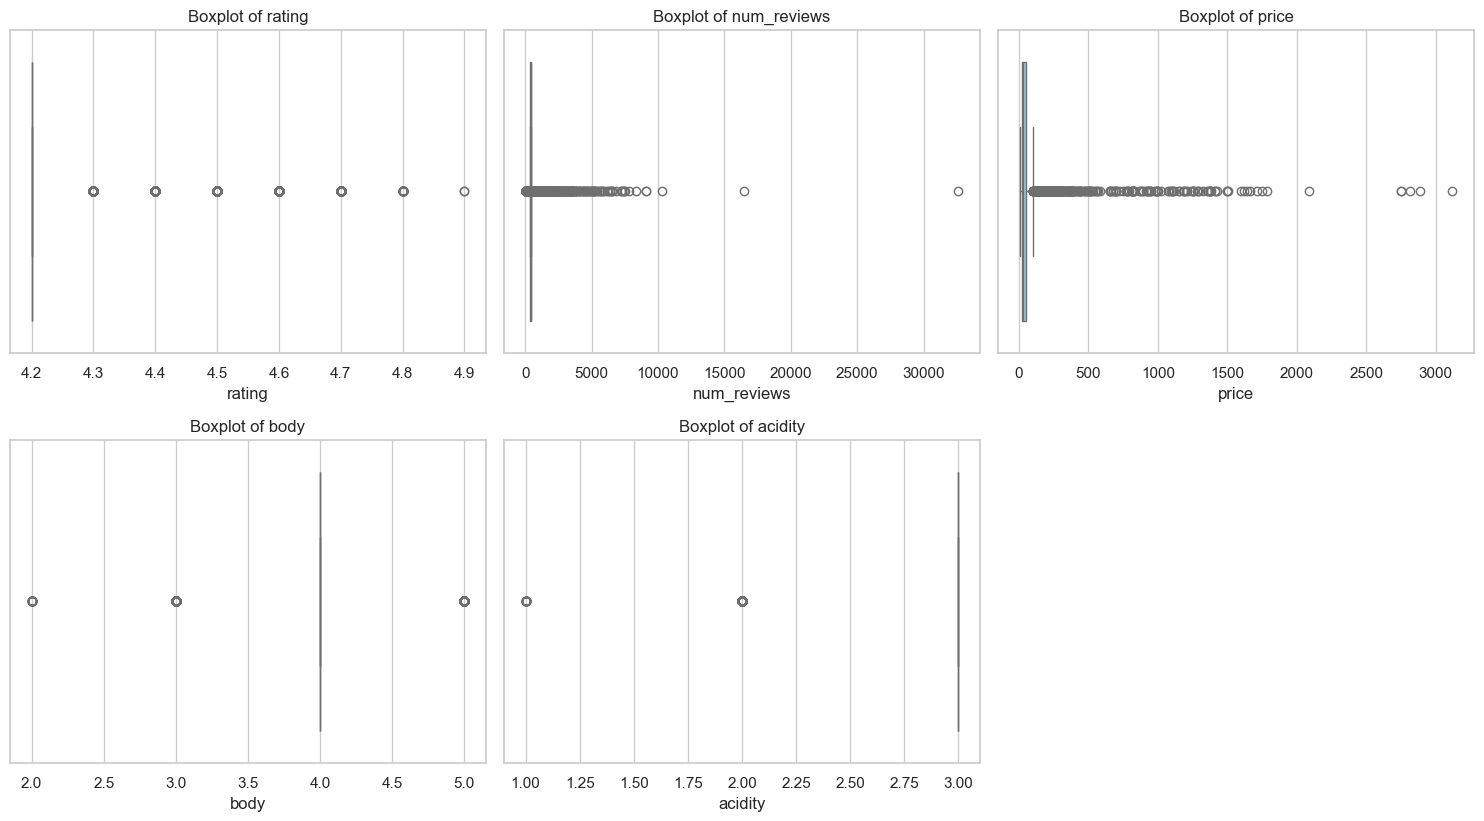

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set style
sns.set(style="whitegrid")

# Plot boxplots for numerical columns
plt.figure(figsize=(15, 12))
# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns

for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(data=df, x=col, color='skyblue')
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()


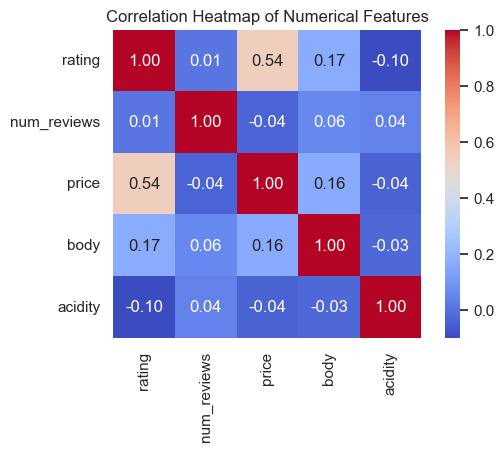

In [6]:
# Compute the correlation matrix
corr_matrix = df[numerical_cols].corr()

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True)
plt.title("Correlation Heatmap of Numerical Features")
plt.show()


C:\Users\lenovo\AppData\Local\Temp\ipykernel_17520\2028772129.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['type'].fillna(df['type'].mode()[0], inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17520\2028772129.py:12: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

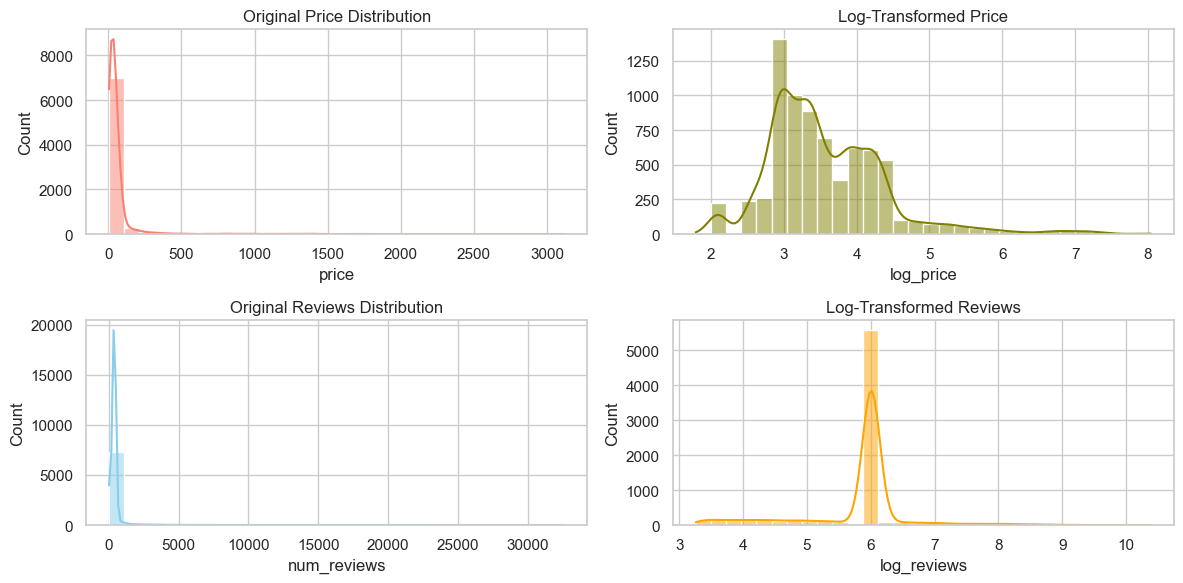

In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Load the dataset
df = pd.read_csv("wines_SPA.csv")

# Handle missing values
df = df.dropna(subset=['year'])
df['type'].fillna(df['type'].mode()[0], inplace=True)
df['body'].fillna(df['body'].median(), inplace=True)
df['acidity'].fillna(df['acidity'].median(), inplace=True)

# Select numerical columns
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns.tolist()

# Apply log1p to price and num_reviews
df['log_price'] = np.log1p(df['price'])
df['log_reviews'] = np.log1p(df['num_reviews'])

# Plotting original vs log-transformed values
plt.figure(figsize=(12, 6))

# Original price
plt.subplot(2, 2, 1)
sns.histplot(df['price'], bins=30, kde=True, color='salmon')
plt.title('Original Price Distribution')

# Log-transformed price
plt.subplot(2, 2, 2)
sns.histplot(df['log_price'], bins=30, kde=True, color='olive')
plt.title('Log-Transformed Price')

# Original num_reviews
plt.subplot(2, 2, 3)
sns.histplot(df['num_reviews'], bins=30, kde=True, color='skyblue')
plt.title('Original Reviews Distribution')

# Log-transformed num_reviews
plt.subplot(2, 2, 4)
sns.histplot(df['log_reviews'], bins=30, kde=True, color='orange')
plt.title('Log-Transformed Reviews')

plt.tight_layout()
plt.show()


In [8]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

# Reload the dataset (in case it's lost from memory)
df = pd.read_csv("wines_SPA.csv")

# Handle missing values
df = df.dropna(subset=['year'])
df['type'].fillna(df['type'].mode()[0], inplace=True)
df['body'].fillna(df['body'].median(), inplace=True)
df['acidity'].fillna(df['acidity'].median(), inplace=True)

# Make a copy of the cleaned df
df_encoded = df.copy()

# Identify categorical columns
label_cols = df_encoded.select_dtypes(include=['object']).columns

# Apply Label Encoding to each of them
label_encoders = {}
for col in label_cols:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le  # Save encoder if needed later


C:\Users\lenovo\AppData\Local\Temp\ipykernel_17520\2425323137.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['type'].fillna(df['type'].mode()[0], inplace=True)
C:\Users\lenovo\AppData\Local\Temp\ipykernel_17520\2425323137.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.


In [9]:
from sklearn.model_selection import train_test_split

import numpy as np

# Add log_price column to df_encoded if not present
if 'log_price' not in df_encoded.columns:
    df_encoded['log_price'] = np.log1p(df_encoded['price'])

# Features (X) and Target (y)
X = df_encoded.drop(['price', 'log_price'], axis=1)  # Drop original + target from features
y = df_encoded['log_price']  # Target is the log-transformed price

# Split the data
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# 📏 Show the sizes of the resulting sets
print("Training features shape:", X_train.shape)
print("Test features shape:", X_test.shape)
print("Training labels shape:", y_train.shape)
print("Test labels shape:", y_test.shape)


Training features shape: (5998, 10)
Test features shape: (1500, 10)
Training labels shape: (5998,)
Test labels shape: (1500,)


In [10]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model on training data
model.fit(X_train, y_train)

# Predict on test data
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"RMSE on test set: {rmse:.4f}")
print(f"R2 score on test set: {r2:.4f}")


RMSE on test set: 0.4855
R2 score on test set: 0.6683


In [11]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the KNN Regressor
knn_model = KNeighborsRegressor(n_neighbors=5)

# Train the model
knn_model.fit(X_train, y_train)

# Predict on test data
y_knn_pred = knn_model.predict(X_test)

# Evaluate the model
mse_knn = mean_squared_error(y_test, y_knn_pred)
rmse_knn = np.sqrt(mse_knn)
r2_knn = r2_score(y_test, y_knn_pred)

print(f"KNN RMSE: {rmse_knn:.4f}")
print(f"KNN R2 Score: {r2_knn:.4f}")


KNN RMSE: 0.4563
KNN R2 Score: 0.7070


In [12]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the model
dt_model = DecisionTreeRegressor(random_state=42)

# Train the model
dt_model.fit(X_train, y_train)

# Predict on test data
y_dt_pred = dt_model.predict(X_test)

# Evaluate the model
mse_dt = mean_squared_error(y_test, y_dt_pred)
rmse_dt = np.sqrt(mse_dt)
r2_dt = r2_score(y_test, y_dt_pred)

print(f"Decision Tree RMSE: {rmse_dt:.4f}")
print(f"Decision Tree R2 Score: {r2_dt:.4f}")


Decision Tree RMSE: 0.3836
Decision Tree R2 Score: 0.7929


In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the model
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model
rf_model.fit(X_train, y_train)

# Predict on test set
rf_pred = rf_model.predict(X_test)

# Evaluate
rf_mse = mean_squared_error(y_test, rf_pred)
rf_rmse = np.sqrt(rf_mse)
rf_r2 = r2_score(y_test, rf_pred)

print(f"Random Forest RMSE: {rf_rmse:.4f}")
print(f"Random Forest R2 Score: {rf_r2:.4f}")

Random Forest RMSE: 0.2750
Random Forest R2 Score: 0.8936


In [14]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the model
gbr_model = GradientBoostingRegressor(random_state=42)

# Train the model
gbr_model.fit(X_train, y_train)

# Predict on test data
y_gbr_pred = gbr_model.predict(X_test)

# Evaluate the model
mse_gbr = mean_squared_error(y_test, y_gbr_pred)
rmse_gbr = np.sqrt(mse_gbr)
r2_gbr = r2_score(y_test, y_gbr_pred)

print(f"Gradient Boosting RMSE: {rmse_gbr:.4f}")
print(f"Gradient Boosting R2 Score: {r2_gbr:.4f}")


Gradient Boosting RMSE: 0.2834
Gradient Boosting R2 Score: 0.8869


In [15]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the model
ada_model = AdaBoostRegressor(random_state=42, n_estimators=100)

# Train the model
ada_model.fit(X_train, y_train)

# Predict on test data
y_ada_pred = ada_model.predict(X_test)

# Evaluate the model
mse_ada = mean_squared_error(y_test, y_ada_pred)
rmse_ada = np.sqrt(mse_ada)
r2_ada = r2_score(y_test, y_ada_pred)

print(f"AdaBoost RMSE: {rmse_ada:.4f}")
print(f"AdaBoost R2 Score: {r2_ada:.4f}")


AdaBoost RMSE: 0.5868
AdaBoost R2 Score: 0.5153


In [17]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the model
xgb_model = XGBRegressor(random_state=42)

# Train the model
xgb_model.fit(X_train, y_train)

# Predict on test data
y_xgb_pred = xgb_model.predict(X_test)

# Evaluate the model
mse_xgb = mean_squared_error(y_test, y_xgb_pred)
rmse_xgb = np.sqrt(mse_xgb)
r2_xgb = r2_score(y_test, y_xgb_pred)

print(f"XGBoost RMSE: {rmse_xgb:.4f}")
print(f"XGBoost R2 Score: {r2_xgb:.4f}")


XGBoost RMSE: 0.2652
XGBoost R2 Score: 0.9010


In [18]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Initialize the model
lgb_model = LGBMRegressor(random_state=42)

# Train the model
lgb_model.fit(X_train, y_train)

# Predict on test data
y_lgb_pred = lgb_model.predict(X_test)

# Evaluate the model
mse_lgb = mean_squared_error(y_test, y_lgb_pred)
rmse_lgb = np.sqrt(mse_lgb)
r2_lgb = r2_score(y_test, y_lgb_pred)

print(f"LightGBM RMSE: {rmse_lgb:.4f}")
print(f"LightGBM R2 Score: {r2_lgb:.4f}")


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000920 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 852
[LightGBM] [Info] Number of data points in the train set: 5998, number of used features: 9
[LightGBM] [Info] Start training from score 3.564251
LightGBM RMSE: 0.2482
LightGBM R2 Score: 0.9133


In [19]:
from sklearn.model_selection import GridSearchCV
from lightgbm import LGBMRegressor

# Define the parameter grid
param_grid = {
    'num_leaves': [31, 50],
    'max_depth': [-1, 10, 20],
    'learning_rate': [0.1, 0.01],
    'n_estimators': [100, 200]
}

# Initialize the model
lgb_model = LGBMRegressor(random_state=42)

# Grid search with 3-fold CV
grid_search = GridSearchCV(estimator=lgb_model, param_grid=param_grid, 
                           cv=3, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Output best model and parameters
print("Best Parameters:", grid_search.best_params_)
print("Best Score (Neg MSE):", grid_search.best_score_)

# Save the best model
best_lgb_model = grid_search.best_estimator_


Fitting 3 folds for each of 24 candidates, totalling 72 fits
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000569 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 852
[LightGBM] [Info] Number of data points in the train set: 5998, number of used features: 9
[LightGBM] [Info] Start training from score 3.564251
Best Parameters: {'learning_rate': 0.1, 'max_depth': -1, 'n_estimators': 200, 'num_leaves': 31}
Best Score (Neg MSE): -0.08248472446269743


C:\Users\lenovo\AppData\Local\Temp\ipykernel_17520\1288578983.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=feat_importance_df, x='Importance', y='Feature', palette='viridis')


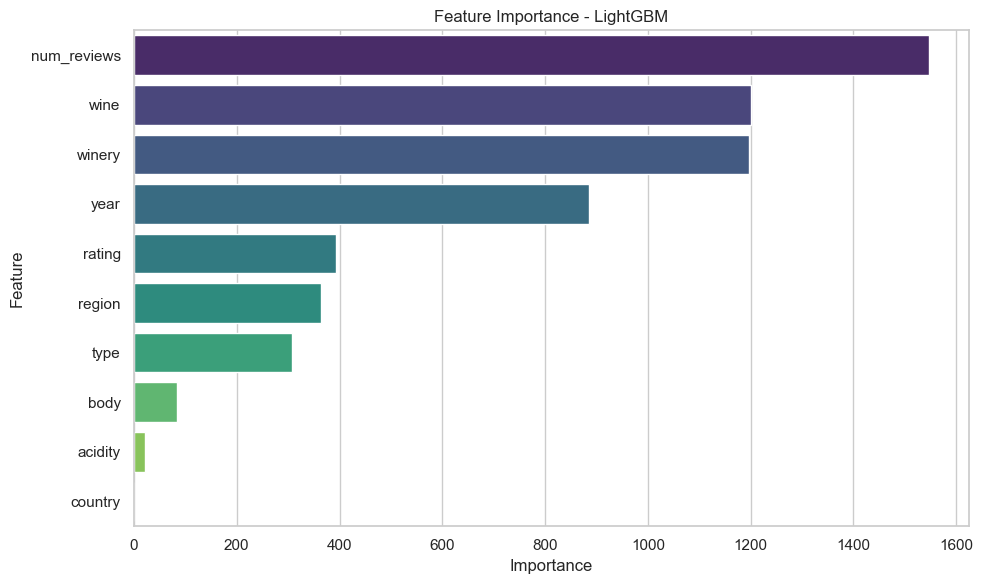

In [20]:
import matplotlib.pyplot as plt
import seaborn as sns

# Get feature importances
importances = best_lgb_model.feature_importances_
features = X_train.columns

# Create a DataFrame for easy plotting
feat_importance_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_importance_df = feat_importance_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_importance_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importance - LightGBM')
plt.tight_layout()
plt.show()


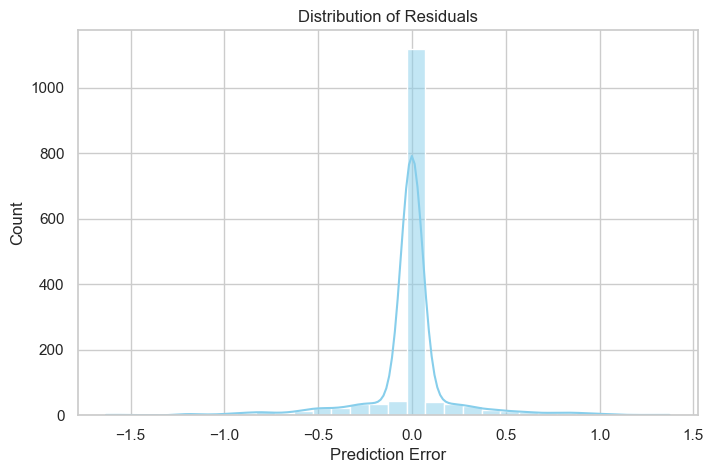

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

# Predict on test data using best model
y_pred_best = best_lgb_model.predict(X_test)

# Residuals
residuals = y_test - y_pred_best

# Plot
plt.figure(figsize=(8, 5))
sns.histplot(residuals, kde=True, bins=30, color="skyblue")
plt.title("Distribution of Residuals")
plt.xlabel("Prediction Error")
plt.show()


In [22]:
# Save the best model using joblib
import joblib
joblib.dump(best_lgb_model, 'best_wine_quality_model.pkl')


['best_wine_quality_model.pkl']